In [1]:
import os
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
import sklearn.decomposition
import mdtraj
import random 
from ensemble_analysis_lib import *
from  plot import *
from functions import *

# N-terminal domain of SIC1
The N-terminal domain of SIC1 (SIC1-NTD) is an essential component of the SIC1 protein, characterized by intrinsically disordered regions (IDRs) that confer conformational flexibility and play crucial roles in protein-protein interactions and cellular regulation. The N-terminal domain of SIC1 has been produced in the laboratory using protein expression and purification techniques and contains phosphorylation sites that influence the regulation of its activity and stability, adding complexity to its biological function.

 Focusing on two ensembles available in the Protein Ensemble Database (PED), PED00159 and PED00160, we will analyze various conformations of the SIC1-NTD protein to better understand its structural dynamics. Comparative statistical analysis will focus on features such as the distribution of alpha carbon atoms, the center of mass of the side chain, and phi and psi angles, revealing any structural differences or similarities.

 ### Alpha carbon

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00159','PED00160']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}


In [3]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00159.dcd.
- Found 500 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00160.dcd.
- Found 500 conformations.


In [4]:
pipeline.featurize(featurization=featurization,
                   featurization_params=featurization_params[featurization])

# Featurizing the PED00159 ensemble.
- Featurized ensemble shape: (500, 4095)
# Featurizing the PED00160 ensemble.


- Featurized ensemble shape: (500, 4095)
Concatenated featurized ensemble shape: (1000, 4095)


In [5]:
trajectories= pipeline.trajectories
trajectories

{'PED00159': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x12d34c9b0>,
 'PED00160': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x12cdce8d0>}

In [6]:
ca_xyz_dict=dict_coord(trajectories)

### Distance matrix and rapresentation

In [7]:
distance_matrix_dict=calculate_distance_matrix_dict(ca_xyz_dict)
distance_matrix_dict

{'PED00159': array([[[0.        , 0.37717813, 0.62496746, ..., 2.0300248 ,
          2.2893655 , 2.4450412 ],
         [0.37717813, 0.        , 0.37408257, ..., 1.7057368 ,
          1.9847769 , 2.1388106 ],
         [0.62496746, 0.37408257, 0.        , ..., 1.8080146 ,
          2.0992239 , 2.2150805 ],
         ...,
         [2.0300248 , 1.7057368 , 1.8080146 , ..., 0.        ,
          0.38463604, 0.6853326 ],
         [2.2893655 , 1.9847769 , 2.0992239 , ..., 0.38463604,
          0.        , 0.38377333],
         [2.4450412 , 2.1388106 , 2.2150805 , ..., 0.6853326 ,
          0.38377333, 0.        ]],
 
        [[0.        , 0.38031167, 0.7229835 , ..., 8.513576  ,
          8.2674885 , 8.010046  ],
         [0.38031167, 0.        , 0.37854165, ..., 8.591036  ,
          8.3341055 , 8.080593  ],
         [0.7229835 , 0.37854165, 0.        , ..., 8.876251  ,
          8.612015  , 8.360438  ],
         ...,
         [8.513576  , 8.591036  , 8.876251  , ..., 0.        ,
          0.

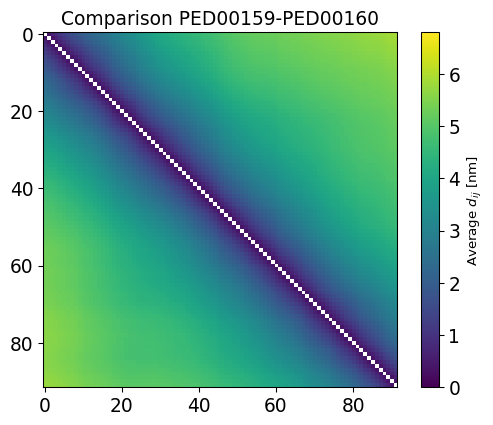

In [8]:
plot_average_dmap_comparison(distance_matrix_dict['PED00159'],distance_matrix_dict['PED00160'],'Comparison PED00159-PED00160')

### Contact matrix and representation

In [9]:
contact_map_dict=get_contact_map_dict(distance_matrix_dict)
contact_map_dict

{'PED00159': array([[1.00002, 1.00002, 1.00002, ..., 0.01202, 0.00802, 0.00402],
        [1.00002, 1.00002, 1.00002, ..., 0.01402, 0.01402, 0.00602],
        [1.00002, 1.00002, 1.00002, ..., 0.01202, 0.00602, 0.00402],
        ...,
        [0.01202, 0.01402, 0.01202, ..., 1.00002, 1.00002, 1.00002],
        [0.00802, 0.01402, 0.00602, ..., 1.00002, 1.00002, 1.00002],
        [0.00402, 0.00602, 0.00402, ..., 1.00002, 1.00002, 1.00002]]),
 'PED00160': array([[1.00002, 1.00002, 1.00002, ..., 0.00602, 0.00802, 0.00802],
        [1.00002, 1.00002, 1.00002, ..., 0.00602, 0.00202, 0.00802],
        [1.00002, 1.00002, 1.00002, ..., 0.00202, 0.00202, 0.00402],
        ...,
        [0.00602, 0.00602, 0.00202, ..., 1.00002, 1.00002, 1.00002],
        [0.00802, 0.00202, 0.00202, ..., 1.00002, 1.00002, 1.00002],
        [0.00802, 0.00802, 0.00402, ..., 1.00002, 1.00002, 1.00002]])}

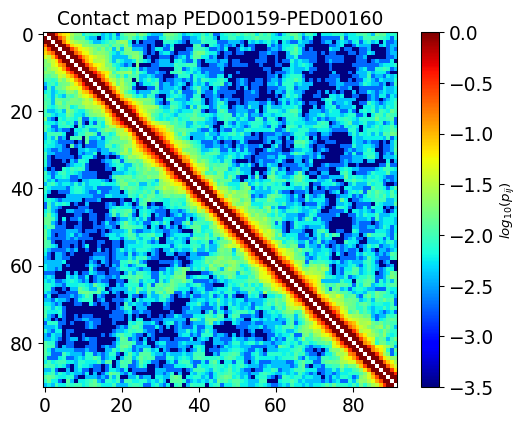

In [10]:
plot_cmap_comparison(contact_map_dict['PED00159'],contact_map_dict['PED00160'],'Contact map PED00159-PED00160')

### Distribution

In [11]:
flattened_dict=flatten_matrices(distance_matrix_dict)
flattened_dict

{'PED00159': array([0.        , 0.37717813, 0.62496746, ..., 0.70490324, 0.37957683,
        0.        ], dtype=float32),
 'PED00160': array([0.        , 0.37596035, 0.67516357, ..., 0.70599943, 0.37836316,
        0.        ], dtype=float32)}

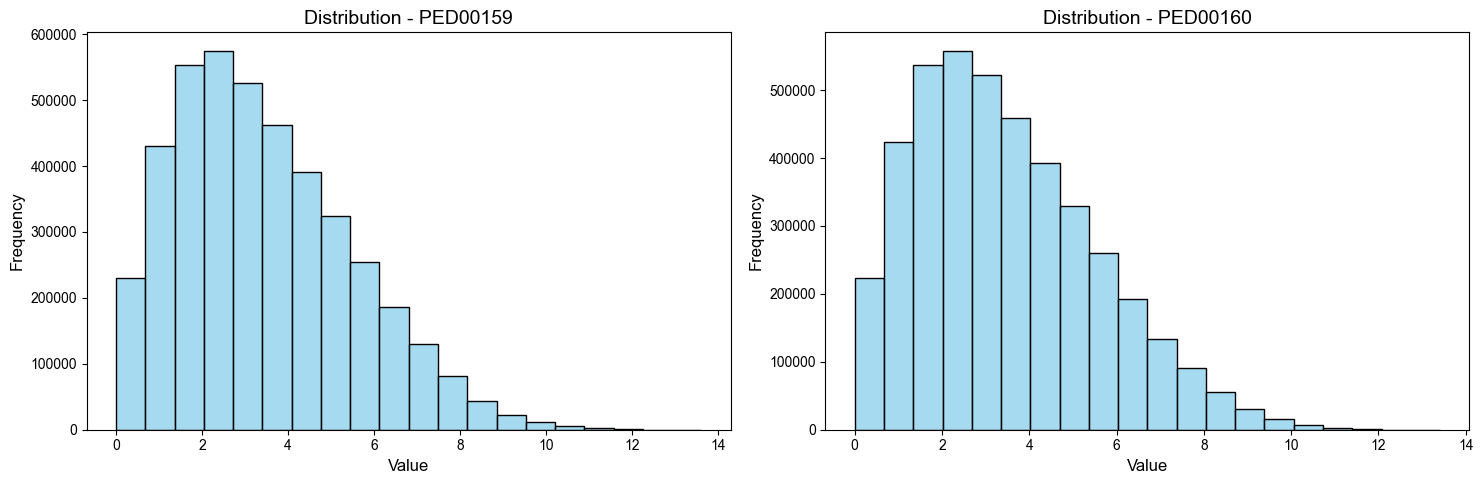

In [12]:
plot_flattened_data(flattened_dict)

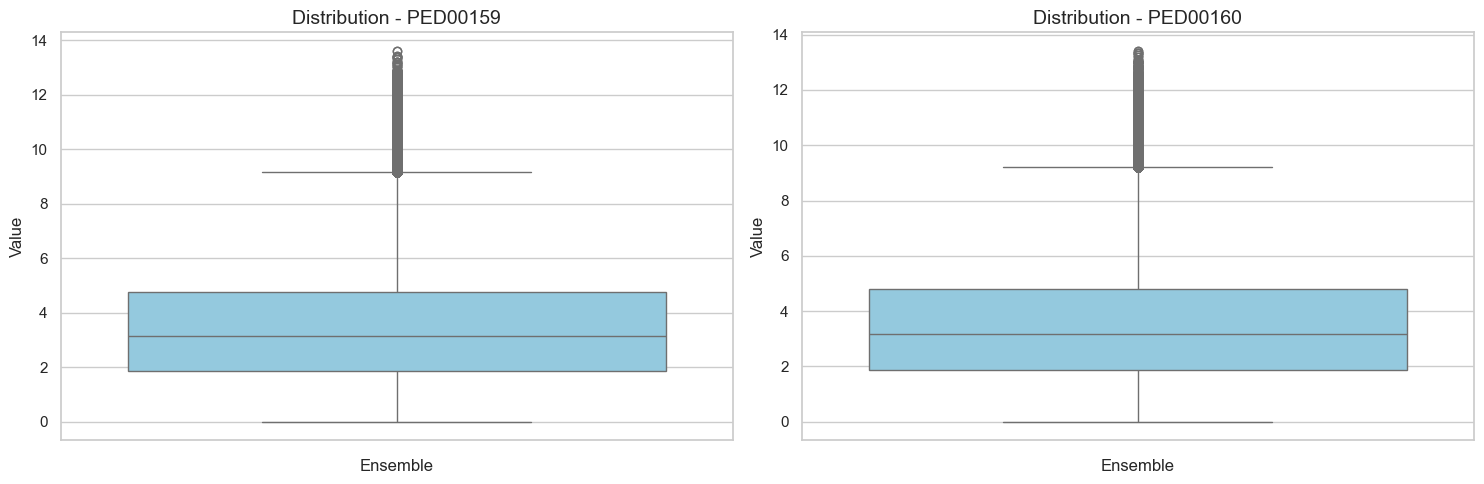

In [13]:
plot_boxplot(flattened_dict)

Sic1-1: This ensemble consists of structures of nonphosphorylated Sic1 generated using SAXS and PRE data. The high-density regions are spread throughout the projection, indicating a diverse range of conformations. Representative conformations (LCSs) exhibit varying degrees of compactness.

Sic1-2: Generated to fit SAX, PRE, and CS data, this ensemble shows three denser regions on the projection with LCSs presenting a similar v-shaped bent in the middle of the structure. The addition of CS data appears to influence the distribution of conformations, leading to the formation of distinct dense regions.
 
 By comparing these two ensembles, we can note that the presence of different experimental data and the phosphorylation of residues significantly influence the distribution of conformations. While Sic1-1 shows a diverse range of conformations distributed evenly, Sic1-2 exhibits formations of more specific dense regions, suggesting a significant influence of additional experimental data and phosphorylation on protein conformation.

### Side chain center of mass

In [14]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00159','PED00160']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "sc_center_of_mass_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}

In [15]:
traj=pipeline.trajectories
traj

{'PED00159': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x12bc8f6e0>,
 'PED00160': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x1293efda0>}

In [16]:
side_center_mass= compute_side_center_mass_dict(traj)
side_center_mass

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x106f86630>>
Traceback (most recent call last):
  File "/opt/anaconda3/envs/ped/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


### Distance matrix and visualization

In [36]:
distance_matrix_side_center_mass_dict=calculate_distance_matrix_dict(side_center_mass)
distance_matrix_side_center_mass_dict

{'PED00159': array([[[0.        , 0.56816847, 0.83886604, ..., 1.9589664 ,
          2.5385141 , 2.50821699],
         [0.56816847, 0.        , 0.78395239, ..., 1.39239809,
          2.01961676, 1.98333781],
         [0.83886604, 0.78395239, 0.        , ..., 1.72172364,
          2.60384106, 2.43636073],
         ...,
         [1.9589664 , 1.39239809, 1.72172364, ..., 0.        ,
          1.09055623, 0.94905011],
         [2.5385141 , 2.01961676, 2.60384106, ..., 1.09055623,
          0.        , 0.68011358],
         [2.50821699, 1.98333781, 2.43636073, ..., 0.94905011,
          0.68011358, 0.        ]],
 
        [[0.        , 0.55108414, 1.1025565 , ..., 8.64884811,
          7.98233163, 7.95598403],
         [0.55108414, 0.        , 0.76144746, ..., 8.64491496,
          7.95151867, 7.95410649],
         [1.1025565 , 0.76144746, 0.        , ..., 9.2014511 ,
          8.46511972, 8.46559429],
         ...,
         [8.64884811, 8.64491496, 9.2014511 , ..., 0.        ,
          0.

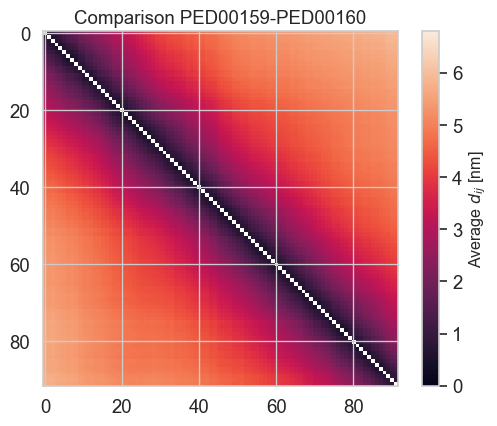

In [37]:
plot_average_dmap_comparison(distance_matrix_side_center_mass_dict['PED00159'],distance_matrix_side_center_mass_dict['PED00160'],'Comparison PED00159-PED00160')

### Contacat map

In [38]:
contact_map_side_chain_dict=get_contact_map_dict(distance_matrix_side_center_mass_dict)
contact_map_side_chain_dict

{'PED00159': array([[1.00002e+00, 1.00002e+00, 3.12020e-01, ..., 1.00200e-02,
         8.02000e-03, 4.02000e-03],
        [1.00002e+00, 1.00002e+00, 9.80020e-01, ..., 1.20200e-02,
         4.02000e-03, 1.40200e-02],
        [3.12020e-01, 9.80020e-01, 1.00002e+00, ..., 4.02000e-03,
         2.00000e-05, 4.02000e-03],
        ...,
        [1.00200e-02, 1.20200e-02, 4.02000e-03, ..., 1.00002e+00,
         3.40020e-01, 4.18020e-01],
        [8.02000e-03, 4.02000e-03, 2.00000e-05, ..., 3.40020e-01,
         1.00002e+00, 7.08020e-01],
        [4.02000e-03, 1.40200e-02, 4.02000e-03, ..., 4.18020e-01,
         7.08020e-01, 1.00002e+00]]),
 'PED00160': array([[1.00002e+00, 1.00002e+00, 3.38020e-01, ..., 8.02000e-03,
         6.02000e-03, 6.02000e-03],
        [1.00002e+00, 1.00002e+00, 9.86020e-01, ..., 6.02000e-03,
         2.00000e-05, 8.02000e-03],
        [3.38020e-01, 9.86020e-01, 1.00002e+00, ..., 2.02000e-03,
         4.02000e-03, 4.02000e-03],
        ...,
        [8.02000e-03, 6.02000e

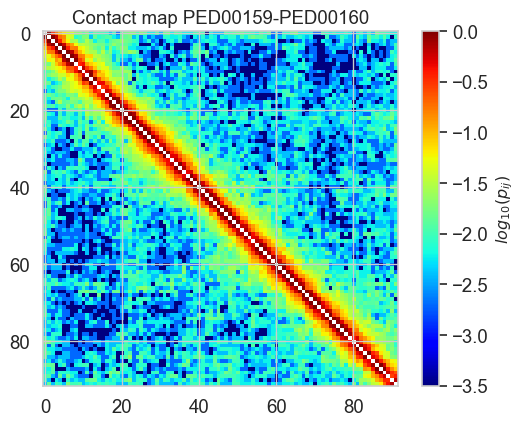

In [40]:
plot_cmap_comparison(contact_map_side_chain_dict['PED00159'],contact_map_side_chain_dict['PED00160'],'Contact map PED00159-PED00160')

### Distribution and visualization

In [41]:
flattened_side_chain_mass_dict=flatten_matrices(distance_matrix_side_center_mass_dict)
flattened_side_chain_mass_dict

{'PED00159': array([0.        , 0.56816847, 0.83886604, ..., 1.14816908, 0.89005807,
        0.        ]),
 'PED00160': array([0.        , 0.54196802, 0.98037035, ..., 0.91177968, 0.68825535,
        0.        ])}

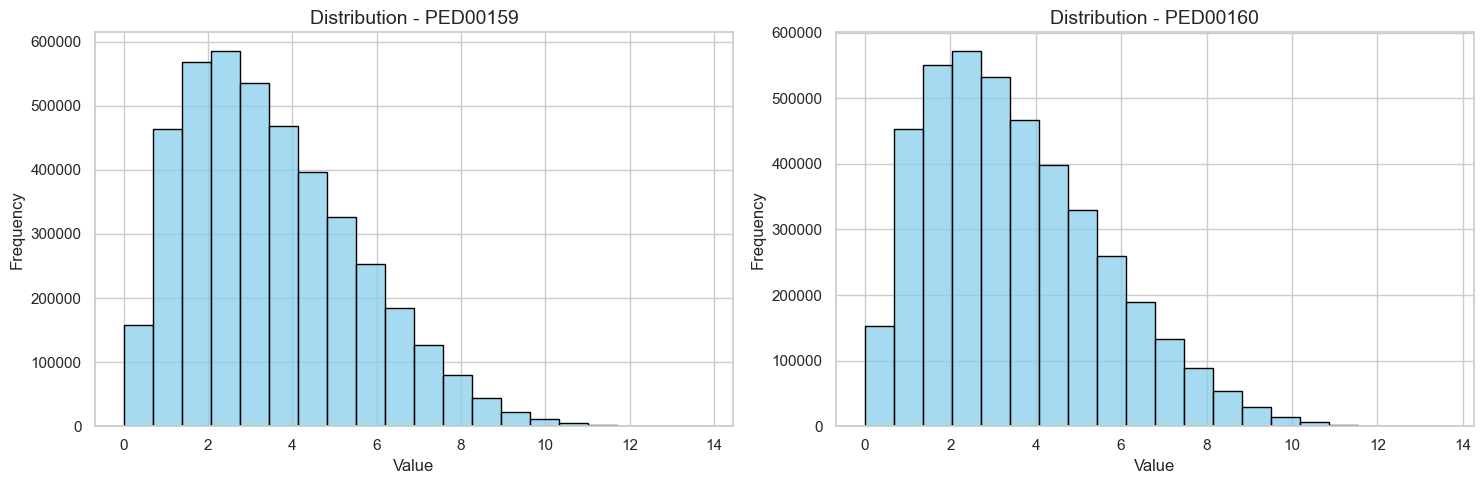

In [42]:
plot_flattened_data(flattened_side_chain_mass_dict)

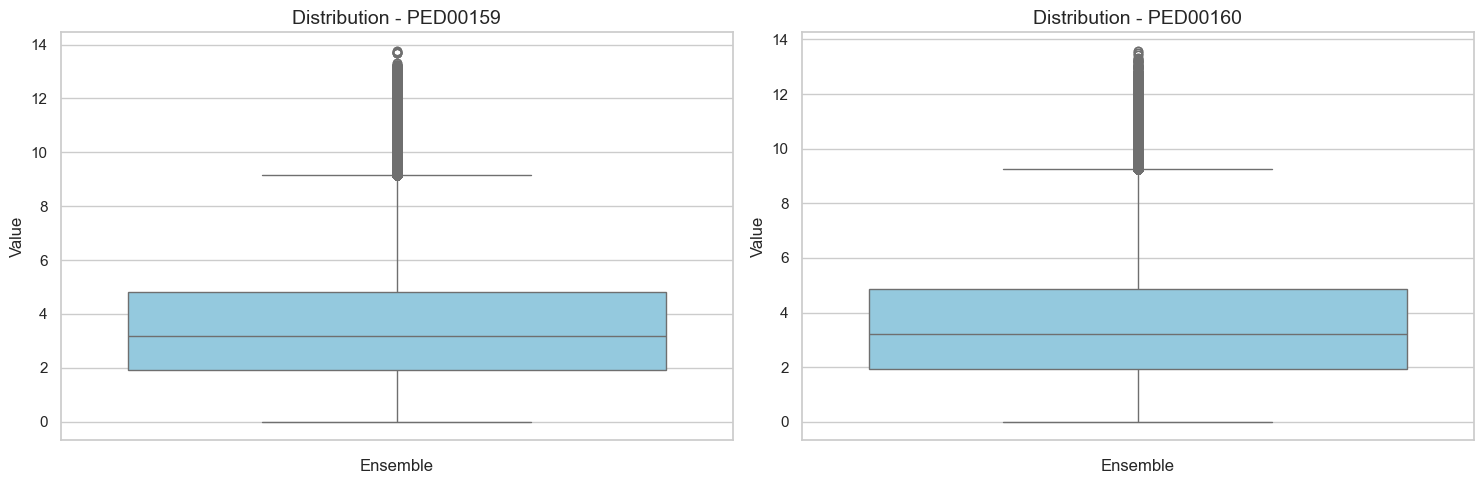

In [43]:
plot_boxplot(flattened_side_chain_mass_dict)

# Angles analysis-Phi and Psi angles

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00159','PED00160']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "phi_psi"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}


In [3]:
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00159.dcd.
- Found 500 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00160.dcd.
- Found 500 conformations.


In [4]:
trajectories_angles= pipeline.trajectories
trajectories_angles

{'PED00159': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x12e037890>,
 'PED00160': <mdtraj.Trajectory with 500 frames, 1374 atoms, 92 residues, without unitcells at 0x12e075880>}

In [5]:
dict_phi_psi_splitted=featurize_and_split_phi_psi(trajectories_angles)

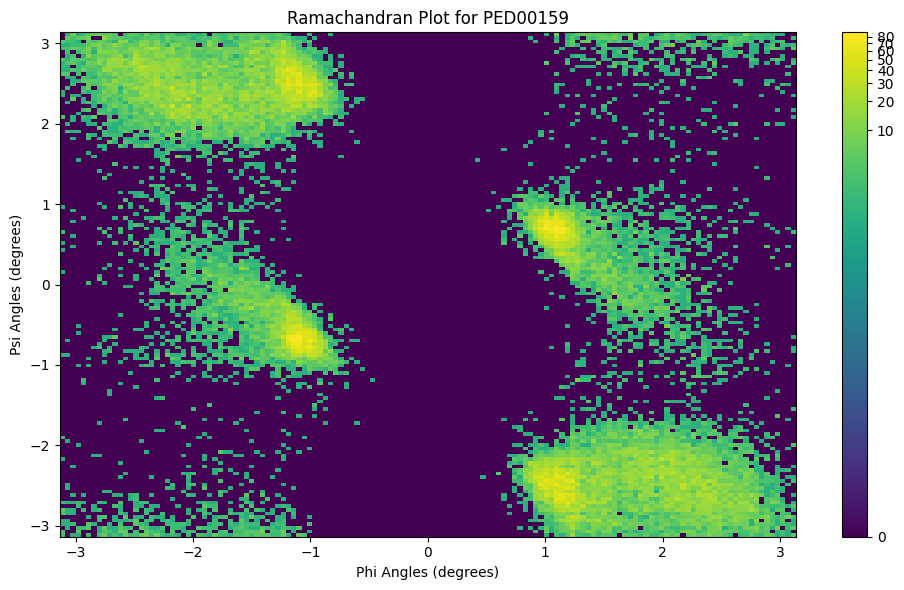

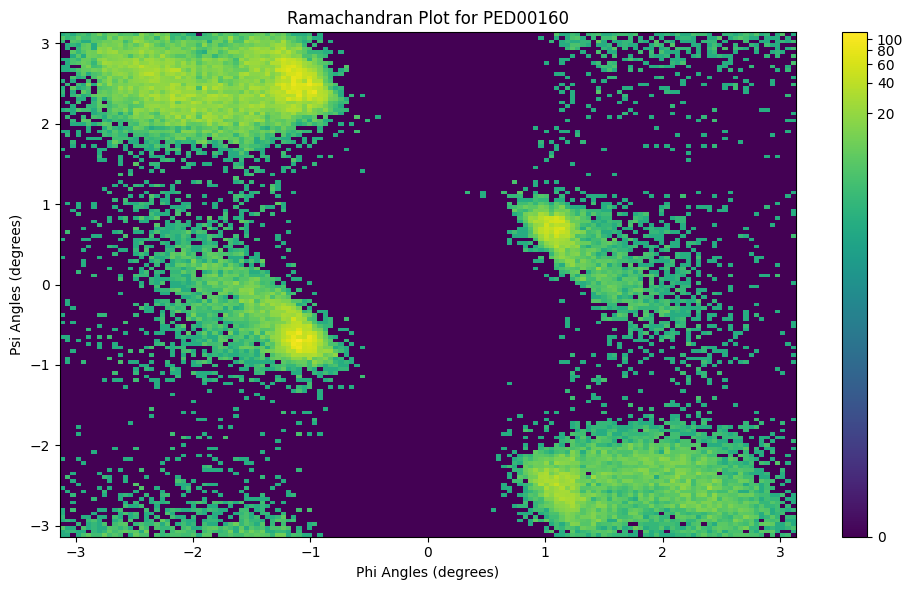

In [6]:
Ramachandran_plot_phi_psi(dict_phi_psi_splitted)

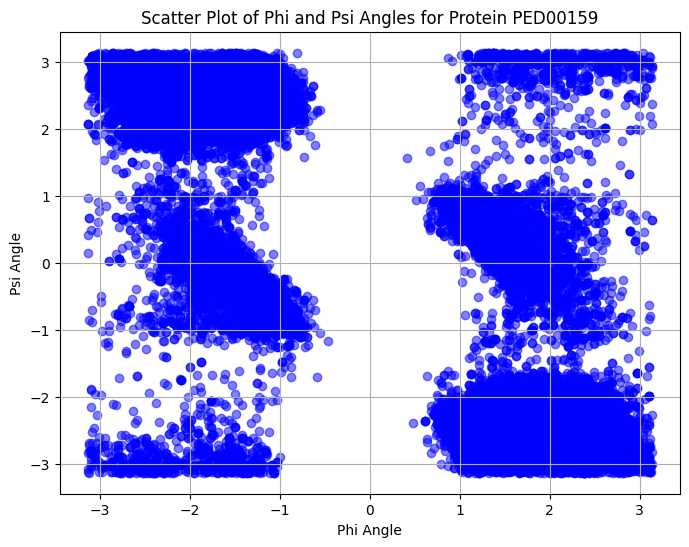

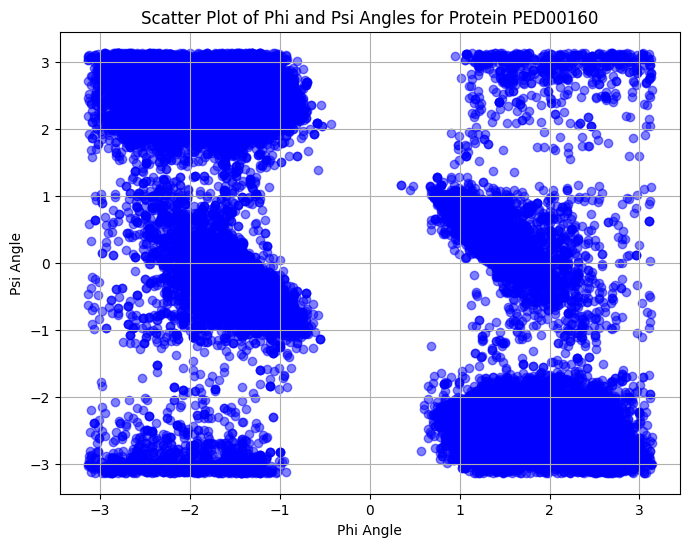

In [7]:
scatter_plot_phi_psi(dict_phi_psi_splitted)

In [8]:
four_consecutive_indices_Calpha=consecutive_4_indices_of_Calpha(trajectories_angles)

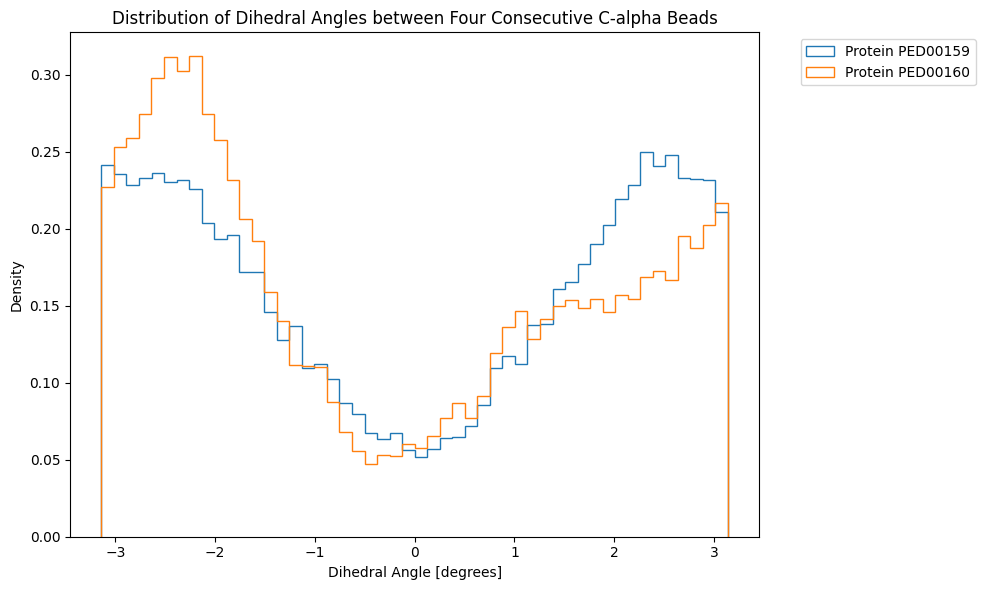

In [9]:
plot_distribution_dihedral_angles(trajectories_angles,four_consecutive_indices_Calpha)

## Global analysis
### Radius-of-gyration

In [2]:
#Codes of the ensembles we want to analyze,corresponding PDB files.
ens_codes = ['PED00159','PED00160']
  
# Directory with the PDB files.
pdb_dp = "/Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1"

# Featurization options.
featurization = "ca_dist"  # choices: "ca_dist", "phi_psi", "sc_center_of_mass_dist" 
featurization_params = {"ca_dist": {"seq_sep": 2, "normalize": True},
                        "phi_psi": {},
                        "a_angle": {},
                        "sc_center_of_mass_dist":{}}
pipeline = EnsembleAnalysis(pdb_dp=pdb_dp,
                            ens_codes=ens_codes)

# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00159.dcd.
- Found 500 conformations.
# Loading /Users/giuliabartocci/Desktop/AA/EXAMPLE/SIC1/PED00160.dcd.
- Found 500 conformations.


In [6]:
trajectories= pipeline.trajectories
Rgs_dict=rg_calculator_dict(trajectories)

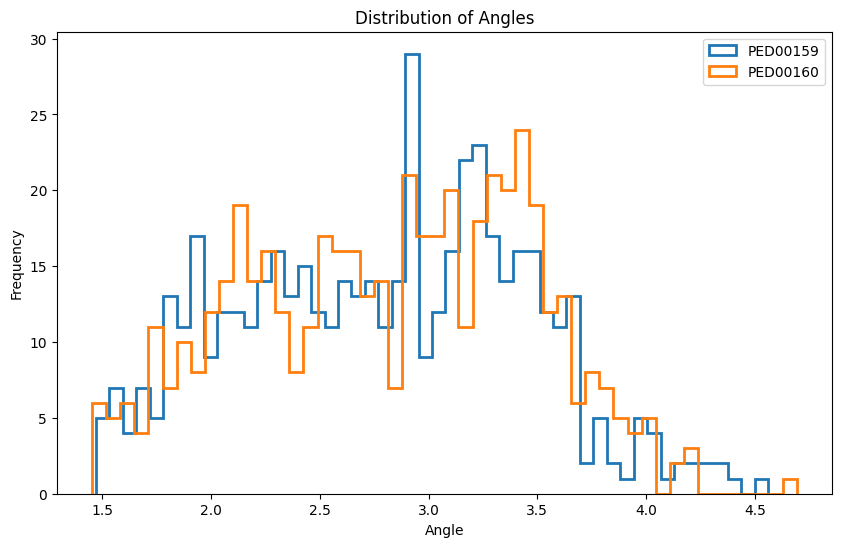

In [12]:
plot_distribution_of_Rgs(Rgs_dict)

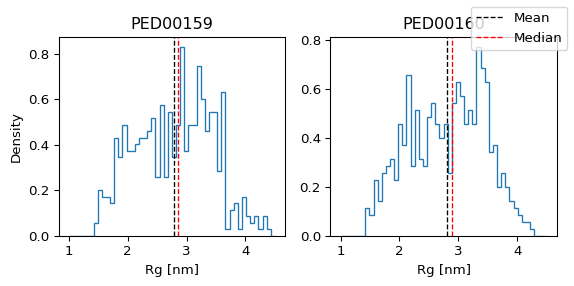

In [13]:
plot_rg_comparison(Rgs_dict)

### Alpha-helix content

In [14]:
dssp_dict=get_dssp_dict(trajectories)

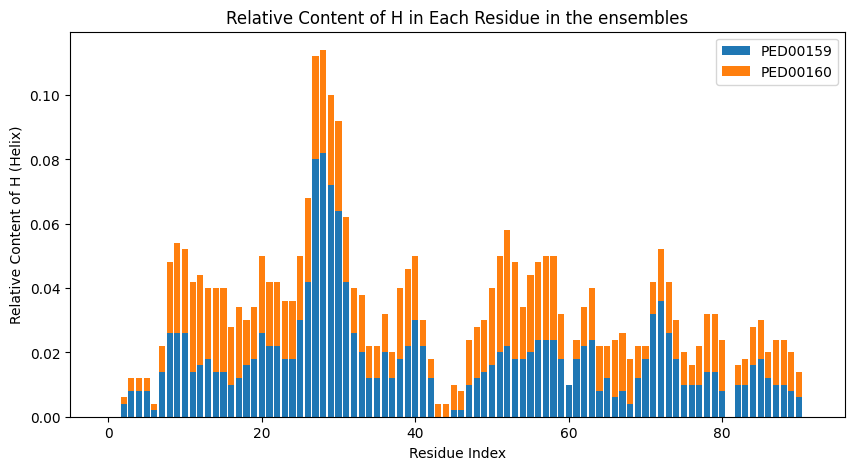

In [16]:
plot_relative_helix_content_multiple_proteins(dssp_dict)

### Asphericity

In [4]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
asphericity_dict=calculate_asphericity_dict(gyration_tensors_dict)

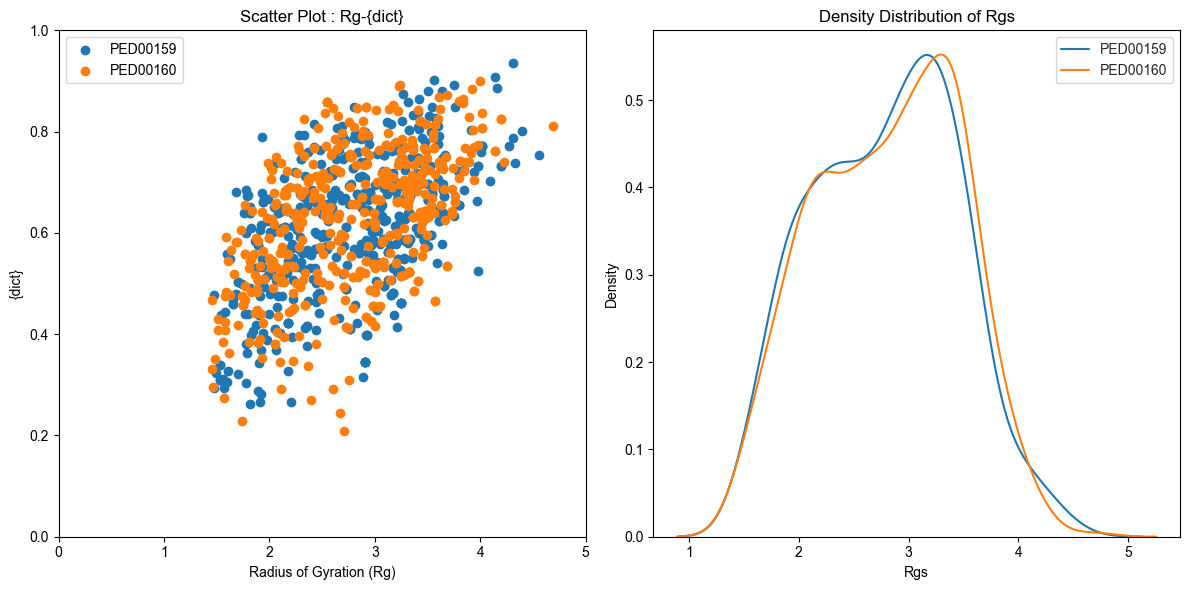

In [5]:
scatterplot_rg_asphericity(Rgs_dict,asphericity_dict)

## Prolateness

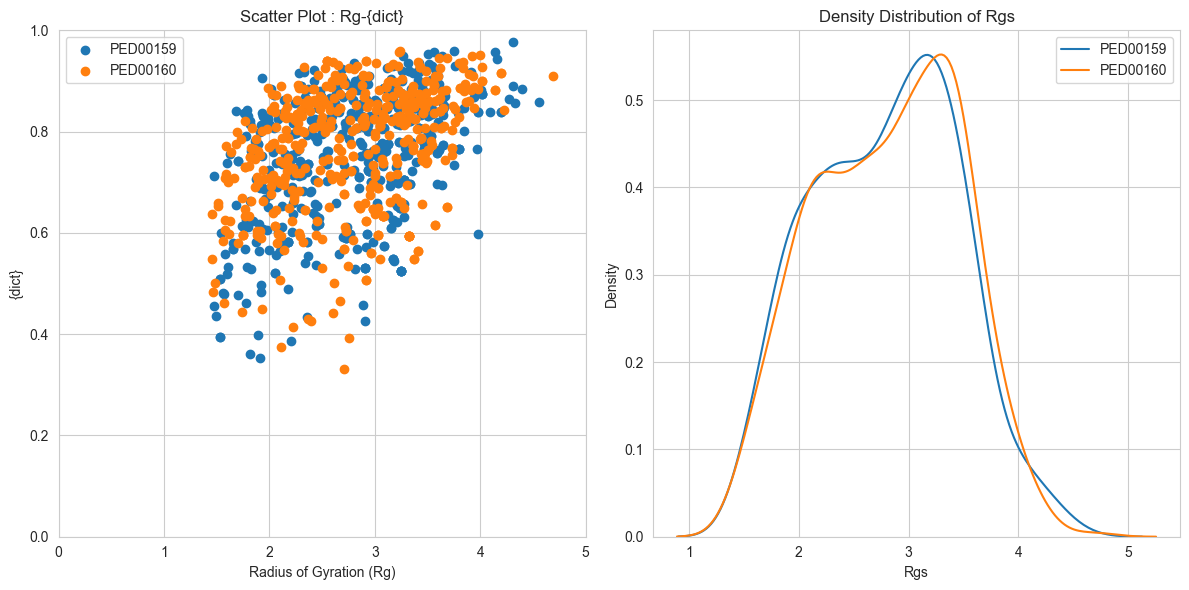

In [6]:
gyration_tensors_dict=get_gyration_tensors_dict(trajectories)
prolateness_dict=calculate_prolateness_dict(gyration_tensors_dict)
scatterplot_rg_asphericity(Rgs_dict,prolateness_dict)

## End-to-End distance

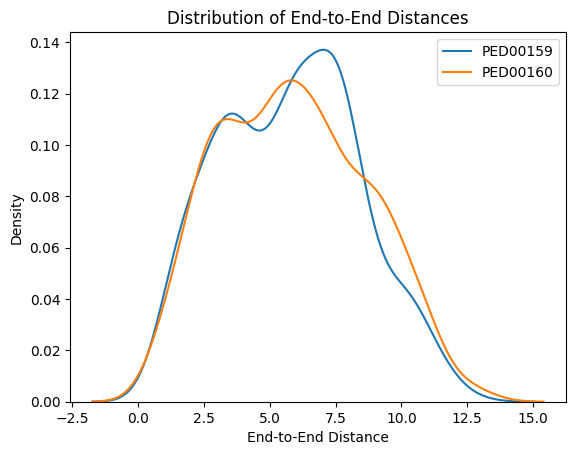

In [6]:
calculate_and_plot_end_to_end_distance(trajectories)